<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/RecursiveFeatureElimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Recursive feature elimination
This example demonstrates how Recursive Feature Elimination (RFE) can be used to determine the importance of individual pixels for classifying handwritten digits. RFE recursively removes the least significant features, assigning ranks based on their importance, where higher ranking_ values denote lower importance. The ranking is visualized using both shades of blue and pixel annotations for clarity. As expected, pixels positioned at the center of the image tend to be more predictive than those near the edges.

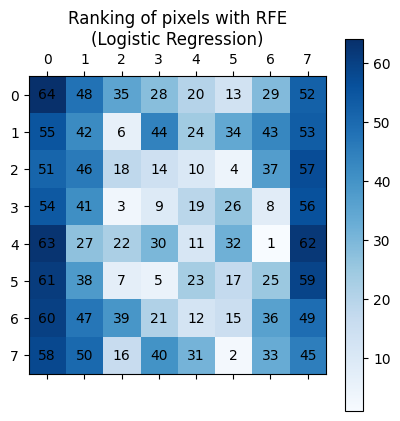

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rfe", RFE(estimator=LogisticRegression(), n_features_to_select=1, step=1)),
    ]
)

pipe.fit(X, y)
ranking = pipe.named_steps["rfe"].ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)

# Add annotations for pixel numbers
for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of pixels with RFE\n(Logistic Regression)")
plt.show()